In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/RecipeGen/RecipeGeneratorNLP

/content/gdrive/MyDrive/RecipeGen/RecipeGeneratorNLP


In [2]:
!ls
from tqdm import tqdm
import string

LICENSE                                 drive-download-20230416T043615Z-001
Preprocessing.ipynb                     drive-download-20230416T043615Z-001.zip
README.md                               generate_dataset.py
Recipe                                  main.py
RecipeGenerator                         model_inspect.ipynb
RecipeGenerator.xcodeproj               requirements.txt
RecipeTraining.ipynb                    test.py
Testing.py                              test_df.csv
Training.py                             train.py
__pycache__                             train_df.csv


In [3]:
import re
import pandas as pd
import re
from sklearn.model_selection import train_test_split

In [3]:
import json
with open('Recipe/recipe1M_layers/layer1.json') as json_file:
    data = json.load(json_file)

train_data, test_data = train_test_split(data, test_size = 0.1, shuffle = True)

In [4]:
len(train_data), len(test_data)

(926748, 102972)

In [77]:
recipes = data
recipes[0]['ingredients']

[{'text': '6 ounces penne'},
 {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
 {'text': '1 ounce Cheddar, grated (1/4 cup)'},
 {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
 {'text': '1/4 cup (1/2 stick) unsalted butter'},
 {'text': '1/3 cup all-purpose flour'},
 {'text': '3 cups milk'},
 {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': '1/2 teaspoon kosher salt'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
 {'text': '1/8 teaspoon garlic powder'},
 {'text': '(makes about 4 cups)'}]

In [13]:
def get_ingredients(recipe):    
    ingredients = recipe['ingredients']
    measurements = ['oz', 'ounces','ounce', 'cups', 'cup', 'teaspoon', '/', 'to', 'lbs','lb', 'tsp', 'jar', 'c', 'tbsp', 'tablespoons']
    item_list = []
    for item in ingredients:
        item = item['text']
        item = item.lower()
    #     item = item.split('(')[0].strip() # remove items in brackets
        item = item.translate(str.maketrans('', '', string.punctuation))
        item = re.sub(r'\s*\([^)]*\)', '', item)
        item = ''.join([char for char in item if not char.isdigit()]) # remove numbers
        for measurement in measurements:
            item = item.replace(measurement, '').strip() # remove measurements
        item.strip()
        item = re.sub('\s\s+', ' ', item)
        if item:
            item_list.append(item)

    ingredient_list = ' </I> '.join(item_list)
    return ingredient_list

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_96313/2119430372.py:15: SyntaxWarning: invalid escape sequence '\s'
  item = re.sub('\s\s+', ' ', item)


In [87]:
get_ingredients(recipes[32])

'granulated sugar </I> stik unsalted butter </I> egg whites </I> zest of lemons </I> juie of lemons </I> allpurpose flour </I> baking powder </I> baking soda </I> salt </I> buttermilk </I> blueberries </I> granulated sugar </I> stiks unsalted butter </I> ream heese </I> powdered sugar </I> tablespoon vanilla extrat </I> salt'

In [86]:
def get_instructions(recipe):
    instructions = recipe['instructions']
    instr_str = ""
    for instr in instructions:
      recipe = re.sub(r"\s", " ", instr['text'])
      recipe = re.sub(r'[^\w\s]', ' ', recipe)
      recipe = re.sub('\s\s+', ' ', recipe)
      instr_str += " " + recipe.lower().strip() + "."
    return instr_str

get_instructions(recipes[32])

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/q9/_hwzlyzd14qc0xyjstc7df380000gn/T/ipykernel_93879/2790099523.py:7: SyntaxWarning: invalid escape sequence '\s'
  recipe = re.sub('\s\s+', ' ', recipe)


' for the cupcakes preheat the oven to 350 degrees f fill the cupcake pan with paper liners. beat the granulated sugar and butter until light and fluffy in a standing mixer. beat in the eggs. add the lemon zest and juice and beat until combined. sift the flour baking powder baking soda and salt in a separate bowl. alternately add the buttermilk and flour mixture to the standing mixer beating well between each addition. fill the cupcake liners two thirds full. bake the cupcakes until a toothpick inserted comes out clean 18 to 22 minutes. refrigerate the cupcakes until they are completely cooled. for the filling cook 1 3 cup water 1 cup of the blueberries and granulated sugar over medium heat for 10 minutes stirring frequently. once the blueberries begin to burst add the remaining 1 cup blueberries and cook on medium heat 8 to 10 minutes. the filling is done when it coats the back of a metal spoon. for the frosting beat the butter and cream cheese until light and fluffy in a standing mix

In [88]:
df = pd.DataFrame()
recipes[0].keys()

dict_keys(['ingredients', 'url', 'partition', 'title', 'id', 'instructions'])

In [10]:
def build_text_files(recipes):
  in_recipes=[]
  for recipe in tqdm(recipes):
    ingredients = get_ingredients(recipe)
    instr = get_instructions(recipe)
    qna = { "title": recipe['title'],
            "ingred": ingredients,
            "instructions": instr }
    in_recipes.append(qna)
  return in_recipes

In [11]:
train_df=build_text_files(train_data)

100%|██████████| 926748/926748 [06:00<00:00, 2571.67it/s]


In [12]:
train_df=pd.DataFrame(train_df)

In [13]:
train_df.head()

,title,ingred,instructions
0,Tofu Mochi with Rice Bran,grams fu silken or processed fu </I> tbsp rice...,put the ingredients into a heatproof dish. mi...
1,Seared Scallops Sushi,sea scallops </I> vegetable oil </I> sushi ric...,heat a saute pan over high heat. add enough o...
2,Oat Wheat Bread,lowfat milk warmed about degrees fahrenheit </...,put all ingredients into the bowl of a stand ...
3,Sunshine Chicken,lemon juice </I> orange juice </I> tablespoons...,combine liquid ingredients and spices in bag ...
4,Sauteed Rosemary Mushrooms,mushrooms </I> tbsp unsalted butter </I> tbsp ...,clean trim and quarter all of your mushrooms....


In [14]:
test_df=build_text_files(test_data)

  0%|          | 0/102972 [00:00<?, ?it/s]

100%|██████████| 102972/102972 [00:52<00:00, 1979.46it/s]


In [15]:
test_df=pd.DataFrame(test_df)

In [ ]:
test_df.head()

,title,ingred,instructions
0,Butternut Squash Lasagna,butternut squash diced about squash </I> tbsp ...,preheat oven to 450f. oil 2 large shallow bak...
1,Randy's Delicious Crock Pot Stuffing,butter </I> celery finely chopped </I> onion f...,for the bread around christmas thanksgiving e...
2,Wortel Salade - Carrot Salad,carrot peeled and chopped </I> celery diced </...,combine carrots celery and bell pepper. moist...
3,Good Fries,large russet potaes </I> salt </I> oil for dee...,peel the potatoes and cut into 3 8 inch 1 cm ...
4,Tiramisu,egg yolks </I> white sugar divided </I> pound ...,in a medium bowl beat together the egg yolks ...


In [19]:
train_df.to_csv('train_df.csv')

In [20]:
test_df.to_csv('test_df.csv')

In [47]:
# in train_df find the average length of the ingredients and instructions
x = train_df.copy()
x['ingred_len'] = train_df['ingred'].apply(lambda x: len(x.split()))
x['instr_len'] = train_df['instructions'].apply(lambda x: len(x.split()))


In [42]:
x['ingred_len'].mean(), x['instr_len'].mean(), x['ingred_len'].max(), x['instr_len'].max(), x['ingred_len'].min(), x['instr_len'].min()

(29.059281606486284, 41.953375129631375, 475, 59, 6, 21)

In [52]:
# find the rows where the length of the ingredients and instructions are lower than 5
x = x[(x['ingred_len'] > 5) & (x['instr_len'] > 20) & (x['instr_len'] < 60)].reset_index(drop=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(x):
    x = x.copy()
    x['ingred_len'] = x['ingred'].apply(lambda x: len(x.split()))
    x['instr_len'] = x['instructions'].apply(lambda x: len(x.split()))

    # find the rows lying in the 25th and 75th percentile
    ingred_25 = x['ingred_len'].quantile(0.25)
    ingred_75 = x['ingred_len'].quantile(0.75)
    instr_25 = x['instr_len'].quantile(0.25)
    instr_75 = x['instr_len'].quantile(0.75)

    # find the rows lying in the 25th and 75th percentile
    x = x[(x['ingred_len'] > ingred_25) & (x['ingred_len'] < ingred_75) & (x['instr_len'] > instr_25) & (x['instr_len'] < instr_75)].reset_index(drop=True)

    # plot the distribution of the ingredients and instructions
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))

    sns.histplot(x['ingred_len'], bins=50, color='blue', kde=True, ax=axs[0])
    axs[0].set_title('Distribution of Ingredients Length')

    sns.histplot(x['instr_len'], bins=50, color='red', kde=True, ax=axs[1])
    axs[1].set_title('Distribution of Instructions Length')

    plt.show()

    return x

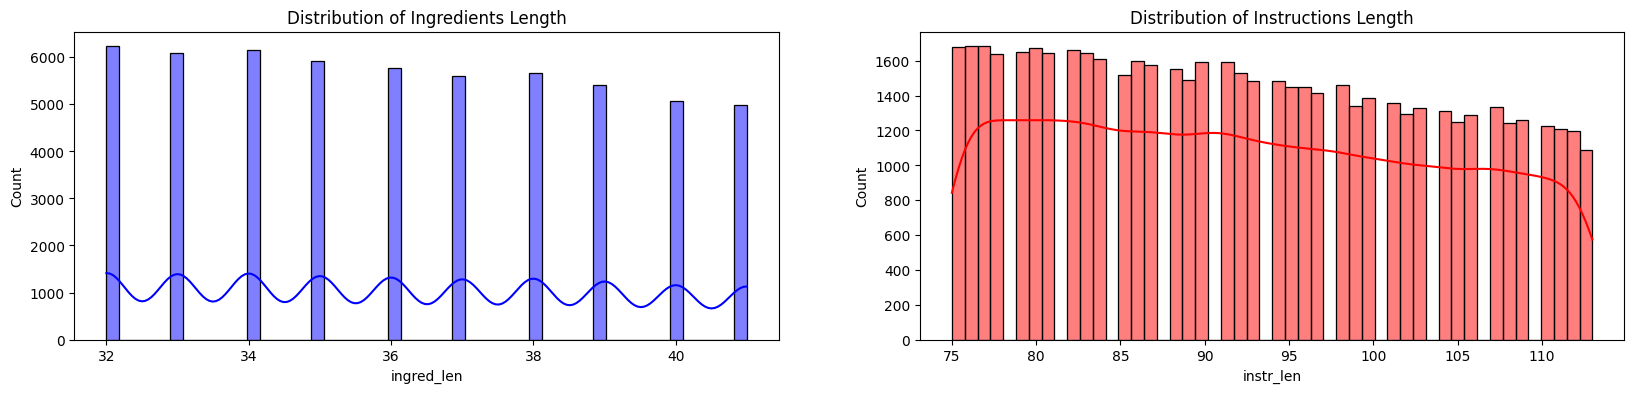

In [9]:
x = plot_distribution(train_data)

In [11]:
x['combined_len'] = x['ingred_len'] + x['instr_len']
x.describe()

,ingred_len,instr_len,combined_len
count,56873.000000,56873.000000,56873.000000
mean,36.296872,92.751200,129.048072
std,2.851187,11.122155,11.569143
min,32.000000,75.000000,107.000000
25%,34.000000,83.000000,119.000000
50%,36.000000,92.000000,128.000000
75%,39.000000,102.000000,139.000000
max,41.000000,113.000000,154.000000


In [15]:
" ".join(x.loc[0]['ingred'].split()), x.loc[0]['ingred']

('bacon slices <I> chopped cremini mushrooms <I> chopped shallots <I> cubed yukon gold or baking pota <I> can fatfree chicken broth divided <I> lowfat milk <I> tablespoons sherry <I> salt <I> pepper',
 'bacon slices <I> chopped cremini mushrooms <I> chopped shallots <I> cubed yukon gold or baking pota <I> can fatfree chicken broth divided <I> lowfat milk <I> tablespoons sherry <I> salt <I> pepper')

In [4]:
train_data = pd.read_csv('train_df.csv', index_col=0)

In [15]:
train_data.loc[0]['instructions'], train_data.loc[302]['ingred']

(' put the ingredients into a heatproof dish. mix well until there are no tofu lumps. lightly wrap with cling film and microwave for 1 minute 15 seconds at 500 600 w. knead the mixture well using a spatula. microwave for another 30 40 seconds. mix it well again and then divide into bite sized pieces. coat the mochi balls in a mixture of kinako and brown sugar and it s done. i coated these ones with green barley and sugar. it s even healthier with matcha or something with vitamin c.',
 'cloves fresh garlic </I> small onion </I> tablespoons olive oil </I> chopped parsley </I> italian sausage cooked and drained </I> parmesan cheese plus additional for pping </I> bread crumbs </I> salt and pepper taste </I> pkgs mushrooms ea </I> small squares provolone cheese')

In [75]:
x.to_csv('train_df.csv')
x_test.to_csv('test_df.csv')